In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

from  matplotlib.ticker import FuncFormatter


In [3]:
%matplotlib inline

# Seaborn defaults
sns.set_theme()
sns.set(style = 'white', font_scale = 1.5, rc = {'figure.figsize':(16, 9)})

In [269]:
varney = pd.read_csv('/Users/sranney/desktop/Varney20032022_fish.csv', skiprows = 8)

varney.head(5)

varney = (
    varney.
    assign(
        log_length = lambda x: np.log(x.Length), 
        log_weight = lambda x: np.log(x.Weight), 
        Species = lambda x: np.where(
            x.Species == 'LL', 'Brown', 
            np.where(x.Species == 'RB', 'Rainbow', "Other"))
    )
)

varney

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Id,Year,Species Code,Species,Length,Weight,M/C,Count,Sex,Mort,...,Water,Section Length,Shock Time (min),Start Time,End Time,Depth StartDepth EndAgency,Unnamed: 38,Unnamed: 39,log_length,log_weight
0,55180206,2004,'004,Brown,66.04,13.608,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,15:20,0,0,FWP,4.190261,2.610658
1,55142745,2004,'004,Brown,68.58,22.680,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,15:20,0,0,FWP,4.228001,3.121483
2,15578238,2005,'004,Brown,68.58,9.072,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,NaN,0,0,FWP,4.228001,2.205193
3,55114884,2004,'004,Brown,71.12,13.608,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,12:15,0,0,FWP,4.264369,2.610658
4,15577753,2005,'004,Brown,76.20,13.608,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,NaN,0,0,FWP,4.333361,2.610658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53598,55110763,2004,'011,Other,368.30,539.784,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,16:30,0,0,FWP,5.908898,6.291169
53599,55110782,2004,'011,Other,370.84,489.888,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,16:30,0,0,FWP,5.915771,6.194177
53600,55180945,2004,'011,Other,388.62,539.784,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,16:00,0,0,FWP,5.962602,6.291169
53601,55180988,2004,'011,Other,441.96,834.624,0,1,NaN,0,...,Madison River,7805.318m,0.0,NaN,16:00,0,0,FWP,6.091219,6.726981


In [270]:
varney.shape

(53603, 42)

In [271]:
varney.Species.unique()

array(['Brown', 'Rainbow', 'Other'], dtype=object)

In [272]:
varney.groupby('Species')['Length'].count()

Species
Brown      34293
Other         13
Rainbow    19297
Name: Length, dtype: int64

In [273]:
prop = lambda x: x.n / x.n.sum()

varney_n = (
    varney.
    query("Species in ('Brown', 'Rainbow') and Length > 0 and Weight > 0").
    groupby(['Year', 'Species'])['Length'].
    count().
    reset_index(name = 'n')
)

varney_prop = (
    varney_n.
    merge(
        varney_n.
        groupby('Year').
        apply(prop).
        reset_index(),
        left_index = True, 
        right_index = True)
)

rename_dict = {'Year_x': 'Year', 'n_x': 'n', 'n_y': 'prop'}

varney_prop = (
    varney_prop[['Year_x', 'Species', 'n_x', 'n_y']].
    rename(columns = rename_dict)
)

varney_prop

,Year,Species,n,prop
0,2003,Brown,2331,0.718336
1,2003,Rainbow,914,0.281664
2,2004,Brown,1989,0.721698
3,2004,Rainbow,767,0.278302
4,2005,Brown,1781,0.678218
5,2005,Rainbow,845,0.321782
6,2006,Brown,2675,0.696615
7,2006,Rainbow,1165,0.303385
8,2007,Brown,2875,0.710403
9,2007,Rainbow,1172,0.289597


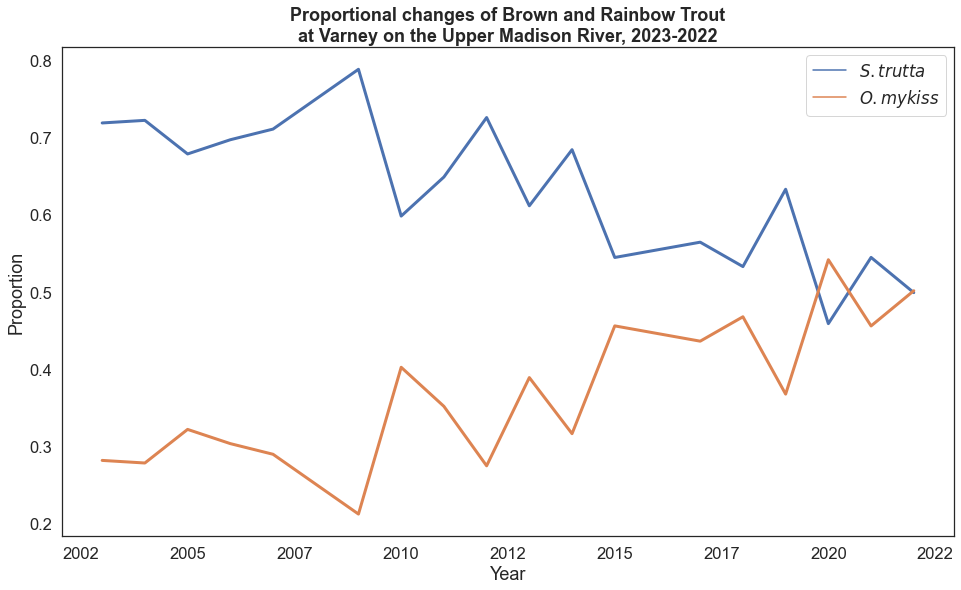

In [274]:
fix, ax = plt.subplots()

g = sns.lineplot(
    data = varney_prop, 
    x = 'Year', y = 'prop', 
    hue = 'Species', linewidth = 3)


# for ax in (ax1, ax2, ax3, ax4):
#     ax.tick_params(axis="x", labelrotation=20, size=8)
#     ax.get_legend().remove()

ax.set_title("Proportional changes of Brown and Rainbow Trout\nat Varney on the Upper Madison River, 2023-2022", fontweight="bold")
ax.set_ylabel('Proportion')
ax.set_xlabel('Year')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
# [i.set_ylabel("") for i in [ax2, ax4]]
# [i.set_xlabel("") for i in [ax1, ax2, ax3, ax4]]
# [i.set_ylabel("") for i in [ax1, ax3]]

ax.legend(
    title="Species", title_fontsize=20, fontsize=20, 
    # labels = ['S. trutta', 'O. mykiss']#, bbox_to_anchor=(1.75, 0.1)
)


# fig.suptitle("30d OAuth Logins - FB4A and FBLite")
# fig.text(0.5, 0, "Login Source", horizontalalignment="center", fontsize=28)
# fig.text(0.95, 0.7, "FB4A", horizontalalignment="left", fontsize=28)
# fig.text(0.95, 0.25, "FB Lite", horizontalalignment="left", fontsize=28)
# fig.text(
#     0.025,
#     0.45,
#     "N Users",
#     horizontalalignment="center",
#     fontsize=28,
#     rotation="vertical",
# )
            
L = plt.legend()
L.get_texts()[0].set_text('$\it{S. trutta}$')
L.get_texts()[1].set_text('$\it{O. mykiss}$')



<AxesSubplot:xlabel='log_length', ylabel='log_weight'>

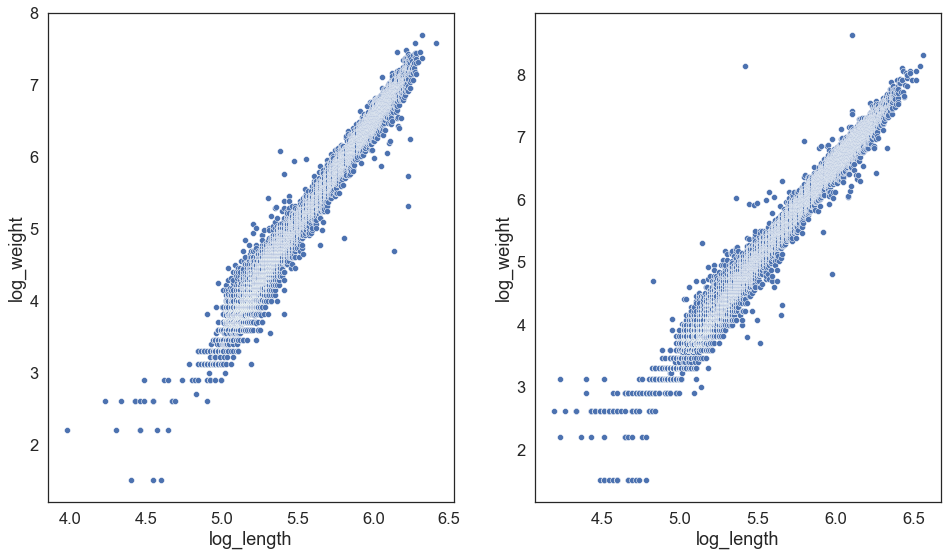

In [276]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title = 'RBT'
sns.scatterplot(data = varney.query("Species == 'Rainbow'"), x = "log_length", y = "log_weight", ax = ax1)

ax2.set_title = 'LL'
sns.scatterplot(data = varney.query("Species == 'Brown'"), x = "log_length", y = "log_weight", ax = ax2)


In [277]:
# instantiate linear regression
mod = lm.LinearRegression()

sp = ['Brown', 'Rainbow']

lin_mod_params = {}

for i in np.arange(0, len(sp)):

    d = varney.query(f"Species == '{sp[i]}' and Length > 0 and Weight > 0")
    x = np.array(d.log_length)
    y = np.array(d.log_weight)

    mod_X = x.reshape(len(x), 1)
    mod_Y = y.reshape(len(y), 1)

    mod.fit(X = mod_X, y = mod_Y)

    mod.get_params()

    sp_params = {
        'intercept': mod.intercept_[0], 
        'slope': mod.coef_[0][0]
    }
    lin_mod_params[sp[i]] = sp_params

lin_mod_params

{'Brown': {'intercept': -11.617449638301348, 'slope': 3.0258859769885893},
 'Rainbow': {'intercept': -11.24986068978772, 'slope': 2.957107803279007}}

In [278]:
rb_params = {
    'intercept': mod.intercept_[0], 
    'slope': mod.coef_[0][0]
}

print(rb_params)

{'intercept': -11.24986068978772, 'slope': 2.957107803279007}


In [279]:


quantiles = [
    # 0.05, 0.25, 0.5, 
    0.75, 
    # 0.95
    ]

years = varney.Year.unique()

d = varney.query(f"Species == 'Brown' and Length > 0 and Weight > 0")[['log_length', 'log_weight']].sample(frac = 0.5)

x = np.array(d.log_length)
y = np.array(d.log_weight)

mod_X = x.reshape(len(x), 1)
mod_Y = y.reshape(len(y), 1)


predictions = {}

for q in quantiles:

    qr = lm.QuantileRegressor(quantile = q, alpha = 0, solver = 'highs')
    y_pred = qr.fit(X = mod_X, y = mod_Y).predict(mod_X)
    predictions[q] = y_pred



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

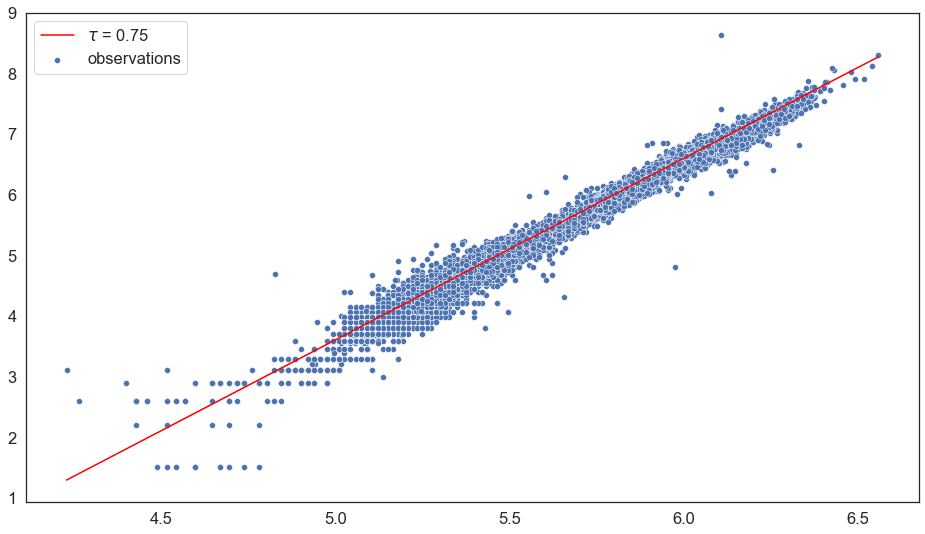

In [280]:
sns.lineplot(x = x, y = predictions[0.75], c = 'red', label = r'$\tau$ = 0.75')
sns.scatterplot(x = x, y = y, label = 'observations')

In [282]:
years = varney.query("Species == 'Brown'").Year.unique()
print(years)

[2004 2005 2007 2003 2006 2009 2017 2022 2011 2010 2020 2012 2014 2019
 2013 2015 2018 2021]


In [292]:
years = varney.query("Species == 'Brown'").Year.unique()

predictions = {}

for year in years:
    d = varney.query(f"Species == 'Rainbow' and Length > 0 and Weight > 0 and Year == {year}")[['log_length', 'log_weight']]#.sample(frac = .75)

    x = np.array(d.log_length)
    y = np.array(d.log_weight)

    mod_X = x.reshape(len(x), 1)
    mod_Y = y.reshape(len(y), 1)

    qr = lm.QuantileRegressor(quantile = 0.75, alpha = 0, solver = 'highs')
    y_pred = qr.fit(X = mod_X, y = mod_Y).predict(mod_X)
    predictions.update({year: np.array([x, y_pred])})



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [293]:
predictions

{2004: array([[3.97668652, 4.39789998, 4.48751214, ..., 6.24043178, 6.24043178,
         6.26488287],
        [0.96392973, 2.14399237, 2.39504788, ..., 7.30599005, 7.30599005,
         7.37449172]]),
 2005: array([[4.22800095, 4.29945991, 4.33336146, ..., 6.21536781, 6.23048145,
         6.23048145],
        [1.43224956, 1.63718001, 1.73440309, ..., 7.13163246, 7.17497544,
         7.17497544]]),
 2007: array([[4.93949727, 4.93949727, 4.93949727, ..., 6.16860604, 6.26488287,
         6.28402221],
        [3.45179162, 3.45179162, 3.45179162, ..., 7.07354069, 7.35723447,
         7.41363134]]),
 2003: array([[4.80336509, 4.84418709, 4.86398971, ..., 6.20516364, 6.21027874,
         6.24537006],
        [3.21367424, 3.32842288, 3.3840871 , ..., 7.15406163, 7.16843993,
         7.26707992]]),
 2006: array([[4.78231168, 4.8834078 , 4.8834078 , ..., 6.25517406, 6.26970216,
         6.27927161],
        [3.00578714, 3.30100317, 3.30100317, ..., 7.3067692 , 7.34919346,
         7.37713771]]),


In [294]:
# for year in years:
#     d = varney.query(f"Species == 'LL' and Length > 0 and Weight > 0 and Year == {year}")[['log_length', 'log_weight']]#.sample(frac = .75)

#     x = np.array(d.log_length)
#     y = np.array(d.log_weight)

#     mod_X = x.reshape(len(x), 1)
#     mod_Y = y.reshape(len(y), 1)

#     qr = lm.QuantileRegressor(quantile = 0.75, alpha = 0, solver = 'highs')
#     y_pred = qr.fit(X = mod_X, y = mod_Y).predict(mod_X)
#     predictions.update({year: np.array([x, y_pred])})


x = np.array(d.log_length)
y = np.array(d.log_weight)

mod_X = x.reshape(len(x), 1)
mod_Y = y.reshape(len(y), 1)

qr = lm.QuantileRegressor(quantile = 0.75, alpha = 0, solver = 'highs')
y_pred = qr.fit(X = mod_X, y = mod_Y).predict(mod_X)





/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [295]:
mod = qr.fit(X = mod_X, y = mod_Y)

    # sp_params = {
    #     'intercept': mod.intercept_[0], 
    #     'slope': mod.coef_[0][0]
    # }


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [296]:
x = np.array(varney.log_length)
y = np.array(varney.log_weight)

mod_X = x.reshape(len(x), 1)
mod_Y = y.reshape(len(y), 1)

x

array([4.19026062, 4.22800095, 4.22800095, ..., 5.962602  , 6.09121938,
       6.10831381])

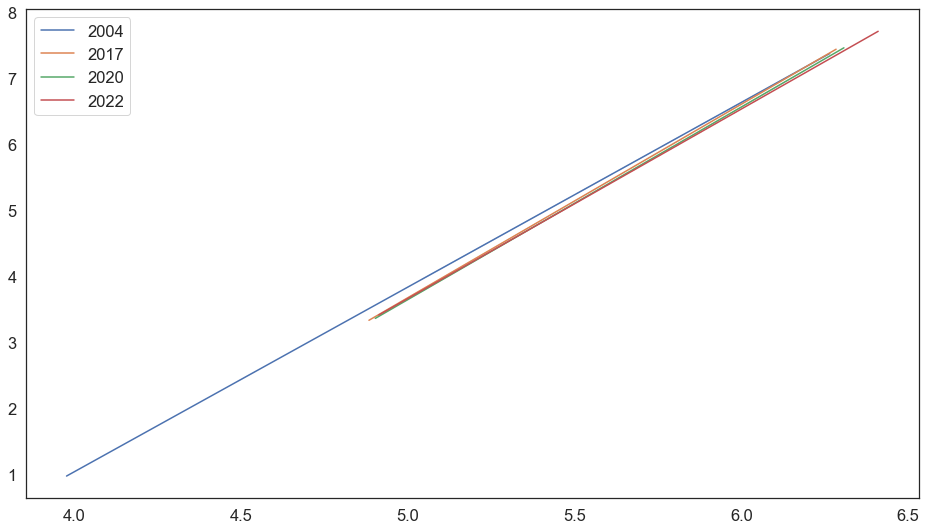

In [298]:
keep_keys = [2004, 2017, 2020, 2022]

keepers = {key: predictions[key] for key in keep_keys}

for k, v in keepers.items():
    sns.lineplot(data = k, x = v[0], y = v[1], label = k)

# sns.scatterplot(data = predictions[2005], x = predictions[2005][0], y = predictions[2005][1])

# a = predictions[2005]

In [299]:
for k, v in predictions.items():
    print(k, v)

2004 [[3.97668652 4.39789998 4.48751214 ... 6.24043178 6.24043178 6.26488287]
 [0.96392973 2.14399237 2.39504788 ... 7.30599005 7.30599005 7.37449172]]
2005 [[4.22800095 4.29945991 4.33336146 ... 6.21536781 6.23048145 6.23048145]
 [1.43224956 1.63718001 1.73440309 ... 7.13163246 7.17497544 7.17497544]]
2007 [[4.93949727 4.93949727 4.93949727 ... 6.16860604 6.26488287 6.28402221]
 [3.45179162 3.45179162 3.45179162 ... 7.07354069 7.35723447 7.41363134]]
2003 [[4.80336509 4.84418709 4.86398971 ... 6.20516364 6.21027874 6.24537006]
 [3.21367424 3.32842288 3.3840871  ... 7.15406163 7.16843993 7.26707992]]
2006 [[4.78231168 4.8834078  4.8834078  ... 6.25517406 6.26970216 6.27927161]
 [3.00578714 3.30100317 3.30100317 ... 7.3067692  7.34919346 7.37713771]]
2009 [[5.00970152 5.02650864 5.04303795 ... 6.19485427 6.23048145 6.23048145]
 [3.60294158 3.65270334 3.70164254 ... 7.11188803 7.21737137 7.21737137]]
2017 [[4.8834078  4.90245599 4.95751577 ... 6.26004025 6.27449833 6.28402221]
 [3.327135

<AxesSubplot:>

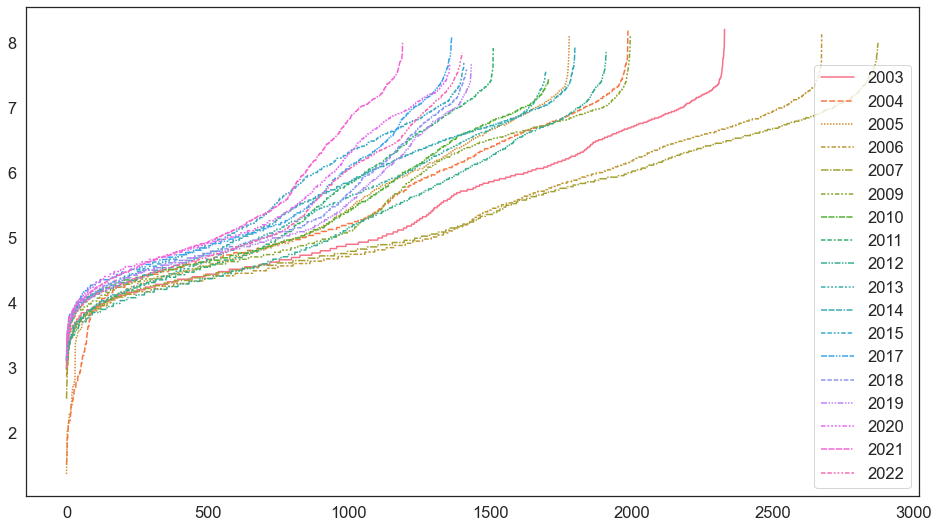

In [61]:
sns.scatterplot(data = )